In [ ]:
import pandas as pd

In [ ]:
#01
myDF = pd.read_csv("test.csv")

In [ ]:
#02
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [ ]:
#03
# deleted model column temporarily
myDF.drop('Model' , axis=1)
myDF

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
3,40,156,44,Q,RHRHJY,IR14,[89$],Asia
4,50,468,33,J,HPQCMC,QX90,[95$],Africa
...,...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,NG88,[51$],South America
946,9470,316,46,L,SHBAUD,IE12,[33$],North America
947,9480,461,46,K,PUZUVO,HB82,[12$],Europe
948,9490,185,13,N,UMESZO,WJ90,[39$],North America


In [ ]:
#04
#There is no output when run the permenant deletion. 
#Also if I view the dataframe by using "myDF", model column is not there.
myDF = myDF.drop('Model' , axis=1)
myDF

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa
...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,[51$],South America
946,9470,316,46,L,SHBAUD,[33$],North America
947,9480,461,46,K,PUZUVO,[12$],Europe
948,9490,185,13,N,UMESZO,[39$],North America


In [ ]:
#05
myDF.drop([1 , 3 , 5] , axis=0 , inplace=True)
myDF.head(4)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,F,NLVQPY,[25$],Europe


In [ ]:
#06
myDF['Range'].mean()

297.53326293558604

In [ ]:
#07
myDF['Type'].value_counts()['F']

50

In [ ]:
myDF['Type'] = myDF['Type'].replace('F' , 'AAA')
myDF.head(5)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,AAA,NLVQPY,[25$],Europe
7,80,495,50,Z,DLUMAX,[70$],Antarctica


In [ ]:
#08
myDF['Cost'] = myDF['Cost'].str.strip("[ $ ]")
print(myDF.head(5))
print(myDF['Cost'].dtypes)

   ID  Range  Value Type Zip Code Cost      Continent
0  10    192     50    F   NXEYEM   56           Asia
2  30    378     28    X   IMGMFY   90  North America
4  50    468     33    J   HPQCMC   95         Africa
6  70    327     24    F   NLVQPY   25         Europe
7  80    495     50    Z   DLUMAX   70     Antarctica
object


In [ ]:
#09
myDF['Cost'] = myDF['Cost'].astype(int)
myDF['Cost']

0      56
2      90
4      95
6      25
7      70
       ..
945    51
946    33
947    12
948    39
949    10
Name: Cost, Length: 947, dtype: int32

In [ ]:
#10
print("Average of Cost column = ", myDF['Cost'].mean() , "\n")
myDF.groupby('Continent')['Cost'].mean()

Average of Cost column =  54.586061246040124 



Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64

In [ ]:
#11
myDF.groupby('Continent').agg({'Cost' : ['min' , 'max' , 'std']})

Cost               
               min max        std
Continent                        
Africa          11  97  25.961432
Antarctica      10  97  24.880590
Asia            10  99  26.109737
Australia       10  97  26.057121
Europe          10  99  26.185054
North America   10  99  25.664821
South America   10  98  25.724780

In [ ]:
#12
myDF.groupby('Continent').agg(['min' , 'max' , 'std'])

ID                    Range                  Value      \
               min   max          std   min  max         std   min max   
Continent                                                                
Africa          50  9450  2614.387519   100  494  118.110406    10  50   
Antarctica      80  9370  2936.313786   106  495  114.401370    10  50   
Asia            10  9390  2683.431665   103  499  112.047425    10  50   
Australia      120  9410  2793.945560   104  496  116.374530    10  50   
Europe          70  9480  2623.991892   101  500  116.808685    10  50   
North America   30  9490  2841.216413   104  500  113.611333    11  50   
South America   90  9500  2656.186804   104  499  117.375623    10  50   

                         Cost                 
                     std  min max        std  
Continent                                     
Africa         12.498931   11  97  25.961432  
Antarctica     11.978316   10  97  24.880590  
Asia           11.752819   10  99  26.109737  
Australia      13.138226   10  97  26.057121  
Europe         11.999544   10  99  26.185054  
North America  12.319601   10  99  25.664821  
South America  11.762450   10  98  25.724780

<AxesSubplot:xlabel='Continent'>

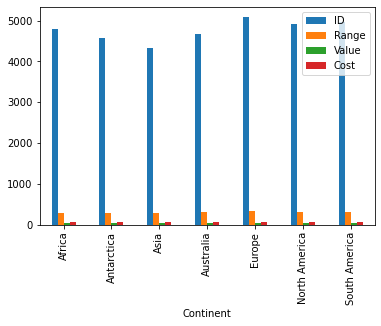

In [ ]:
#13
myDF.groupby('Continent').mean().plot(kind='bar')

In [ ]:
#14
myDF['Continent'].value_counts()

North America    143
Africa           143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: Continent, dtype: int64

In [ ]:
#15
print("Percentage of each continent :")
(myDF['Continent'].value_counts() / myDF['Continent'].value_counts().sum()) * 100

Percentage of each continent :


North America    15.100317
Africa           15.100317
Australia        14.994720
Europe           14.677930
South America    14.255544
Asia             13.621964
Antarctica       12.249208
Name: Continent, dtype: float64

In [ ]:
#16
print("Unique values in Continent column : \n" , myDF['Continent'].unique() ,
"\n\n Number of Unique values in Continent column : \n" , myDF['Continent'].nunique())

Unique values in Continent column : 
 ['Asia' 'North America' 'Africa' 'Europe' 'Antarctica' 'South America'
 'Australia'] 

 Number of Unique values in Continent column : 
 7


In [ ]:
#17
myDF['Cost'].value_counts()

35    20
56    20
73    18
54    17
81    17
      ..
94     5
30     5
77     5
42     3
24     2
Name: Cost, Length: 90, dtype: int64

In [ ]:
# It describes that the occurence of each cost value in the column. 
# For instance, 35 and 56 occured 20 times, 73 occured 18 times.

<AxesSubplot:ylabel='Frequency'>

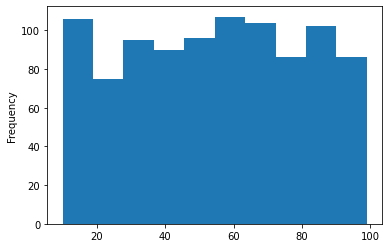

In [ ]:
#18
myDF['Cost'].plot(kind='hist')

In [ ]:
#20
print("Missing values in Zip Code column : " , myDF['Zip Code'].isnull().sum() ,
      "\nMissing values in Type column : " , myDF['Type'].isnull().sum(),
      "\nSummary :\n" , myDF.isnull().sum())

Missing values in Zip Code column :  9 
Missing values in Type column :  2 
Summary :
 ID           0
Range        0
Value        0
Type         2
Zip Code     9
Cost         0
Continent    0
dtype: int64


In [ ]:
#21
print(myDF.dropna().count())
myDF.dropna()
# If we drop all the rows that have any missing value, 
# then the remaining rows will be 936.

ID           936
Range        936
Value        936
Type         936
Zip Code     936
Cost         936
Continent    936
dtype: int64


,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,F,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica
...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,51,South America
946,9470,316,46,L,SHBAUD,33,North America
947,9480,461,46,K,PUZUVO,12,Europe
948,9490,185,13,N,UMESZO,39,North America


In [ ]:
#22
print("Statistics : \n" ,myDF['Type'].value_counts(),
        "\n\nNumber of Missing values : ",myDF['Type'].isnull().sum())



Statistics : 
 F    50
N    47
Q    44
Z    44
C    43
V    41
K    41
A    40
Y    39
H    39
G    38
X    37
M    37
O    36
U    36
J    35
L    35
S    34
I    33
W    32
D    30
B    29
T    28
P    28
R    25
E    24
Name: Type, dtype: int64 

Number of Missing values :  2


In [ ]:
#23
myDF['Type'] = myDF['Type'].fillna('XXX')
print("Statistics : \n" ,myDF['Type'].value_counts(),
        "\n\nNumber of Missing values : ",myDF['Type'].isnull().sum())

Statistics : 
 F      50
N      47
Q      44
Z      44
C      43
V      41
K      41
A      40
Y      39
H      39
G      38
X      37
M      37
U      36
O      36
J      35
L      35
S      34
I      33
W      32
D      30
B      29
P      28
T      28
R      25
E      24
XXX     2
Name: Type, dtype: int64 

Number of Missing values :  0


In [ ]:
#24
myDF = myDF.dropna()
print(myDF.dropna().count())
myDF

ID           938
Range        938
Value        938
Type         938
Zip Code     938
Cost         938
Continent    938
dtype: int64


,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,AAA,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica
...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,51,South America
946,9470,316,46,L,SHBAUD,33,North America
947,9480,461,46,K,PUZUVO,12,Europe
948,9490,185,13,N,UMESZO,39,North America


In [ ]:
#25
myDF = myDF.set_index('ID')
myDF = myDF.rename_axis(index=None)
print(myDF.head())
myDF.loc[[70], 'Value']


    Range  Value Type Zip Code  Cost      Continent
10    192     50  AAA   NXEYEM    56           Asia
30    378     28    X   IMGMFY    90  North America
50    468     33    J   HPQCMC    95         Africa
70    327     24  AAA   NLVQPY    25         Europe
80    495     50    Z   DLUMAX    70     Antarctica


70    24
Name: Value, dtype: int64

In [ ]:
#26
print("### Before get back the ID ###")
print("Index : " , myDF.index, "\n\n" , 
    "Columns : " ,myDF.columns , "\n\n" , 
    "Shape : " ,myDF.shape , "\n\n")

myDF = myDF.rename_axis(index='ID')
myDF = myDF.reset_index()

print("### After get back the ID ###")
print("Index : " , myDF.index, "\n\n" , 
    "Columns : " ,myDF.columns , "\n\n" , 
    "Shape : " ,myDF.shape)


### Before get back the ID ###
Index :  Int64Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
            ...
            9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
           dtype='int64', length=938) 

 Columns :  Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object') 

 Shape :  (938, 6) 


### After get back the ID ###
Index :  RangeIndex(start=0, stop=938, step=1) 

 Columns :  Index(['ID', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object') 

 Shape :  (938, 7)


In [ ]:
#27
myDF.describe()
myDF.loc[0 , 'Value']

50

In [ ]:
#28 
myDF['Continent'].value_counts().sort_values()


Antarctica       115
Asia             129
South America    135
Europe           138
Africa           139
North America    141
Australia        141
Name: Continent, dtype: int64

In [ ]:
myDF['Continent'].value_counts().sort_index(ascending=True)

Africa           139
Antarctica       115
Asia             129
Australia        141
Europe           138
North America    141
South America    135
Name: Continent, dtype: int64

In [ ]:
#29
myDF.iloc[[1,3,5,7]]

,ID,Range,Value,Type,Zip Code,Cost,Continent
1,30,378,28,X,IMGMFY,90,North America
3,70,327,24,AAA,NLVQPY,25,Europe
5,90,115,30,S,KYJUHA,17,South America
7,110,301,29,A,OVINZU,69,South America


In [ ]:
myDF[['Type' , 'Continent']].head(7)

,Type,Continent
0,AAA,Asia
1,X,North America
2,J,Africa
3,AAA,Europe
4,Z,Antarctica
5,S,South America
6,K,South America


In [ ]:
#30
myDF.loc[myDF['Type'] == 'XXX']

,ID,Range,Value,Type,Zip Code,Cost,Continent
687,6940,336,42,XXX,HLULLE,64,South America
743,7550,272,37,XXX,OAPPHA,41,Africa
